### Тема: Точечное оценивание параметров распределения по выборке

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **4**, вариант № **1**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
from time import time
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn

### Задание 1
Пусть случайная величина $X$ имеет равномерное распределение на отрезке $[0,\, 1]$ и $X_1,\, X_2,\, ...,\, X_n$ - случайная выборка объема $n$ генеральной совокупности $X$. Для математического ожидания совокупности рассмотрим две оценки:
 - Выборочное среднее: $\bar{X} = \frac{\sum\limits_{k = 1}^n X_k}{n}$;
 - Случайная величина: $\hat{m} = \frac{X^{(1)} + X^{(2)}}{2}$, где $X^{(1)}$ и $X^{(2)}$ - наименьший и наибольший элементы выборки соотвественно.

Проведите вычислительные эксперименты, позволяющие визуализировать и сопоставить свойства этих оценок, результаты проанализируйте, сформулируйте выводы.
 - Путем компьютерного моделирования получите выборки различного объема $n$ (рассмотрите последовательность $n$ от 50 до 10000 с некоторым шагом). Для каждой выборки вычислите значения обеих оценок. Визуализируйте результаты, построив графики последовательностей реализаций значений оценок. Опираясь на полученные результаты, иследуйте вопрос о состоятельности оценок $\bar{X}$ и $\hat{m}$.
 - Зафиксируйте достаточно большое значение $n$ (например, 10000). Путем компьютерного моделирования сгенерируйте $N$ выборок случайных величин $\bar{X} = \frac{\sum\limits_{k = 1}^n X_k}{n}$ и $\hat{m} = \frac{X^{(1)} + X^{(2)}}{2}$. Опираясь на теорему Чебышёва, исследуйте вопрос о несмещенности оценок $\bar{X}$ и $\hat{m}$ (например, для $\bar{X}$ рассуждаем так: по теореме Чебышёва среднее арифметическое выборочных значений случайной величины $\bar{X}$ сходится по вероятности к математическому ожиданию $\bar{X}$, и, следовательно, при больших $N$ среднее арифметическое выборочных значений случайной величины $\bar{X}$ с вероятностью, близкой к единице, будет "очень близко" к $M[\bar{X}]$, и, значит, при проверке равенства $M[\bar{X}] = M[X]$ можно заменить $M[\bar{X}]$ средним арифметическим выборочных значений случайной величины $\bar{X}$).
 - Зафиксируйте достаточно большое значение $n$. Путем компьютерного моделирования сгенерируйте выборки объема $N$ случайных величин $\bar{X} = \frac{\sum\limits_{k = 1}^n X_k}{n}$ и $\hat{m} = \frac{X^{(1)} + X^{(2)}}{2}$ ($N$ должно быть велико) и визуализируйте их двумя способами: (1) с помощью боксплотов; (2) с помощью гистограммы. Опираясь на полученные результаты, исследуйте вопрос о сравнительной эффективности оценок $\bar{X}$ и $\hat{m}$.

In [2]:
# функция, считающая оценки на равномерном распределении
def uniform_evaluations(a, b, sample_size):
    # генерируем выборку равномерно распределенной случайной величины
    X = np.random.uniform(a, b, sample_size)

    # считаем значение оценкок
    bar_X = sum(X) / sample_size
    hat_m = (min(X) + max(X)) / 2

    return (bar_X, hat_m)

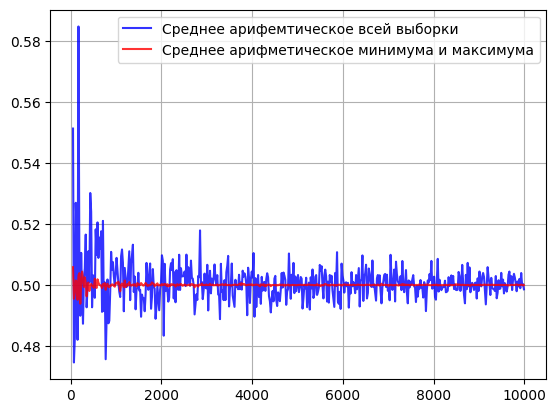

In [3]:
# лист длин выборок
n = [i for i in range(50, 10000, 20)]

# листы выборок оценок
bar_X, hat_m = [], []

# цикл, в котором считаются оценки для разных длин выборок
for i in n:
    a, b = uniform_evaluations(0, 1, i)
    bar_X.append(a)
    hat_m.append(b)

# визуализируем
plt.plot(n, bar_X, color='b', alpha=0.8, label='Среднее арифемтическое всей выборки')
plt.plot(n, hat_m, color='r', alpha=0.8, 
         label='Среднее арифметическое минимума и максимума')
plt.legend()
plt.grid(True)

Как легко заметить из графика - при увеличении выборки оценки начинают сходится к настоящему математическому ожиданию. А это значит, что оценки состоятельные.

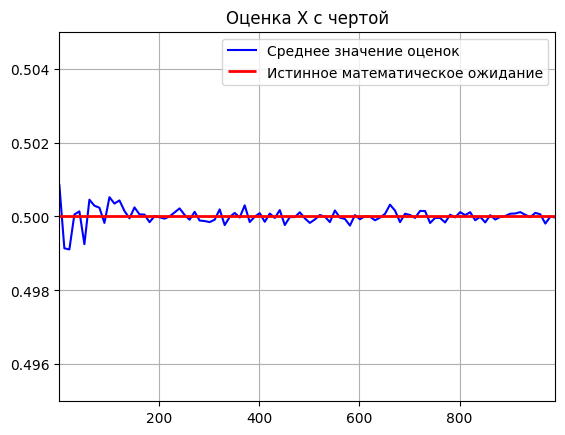

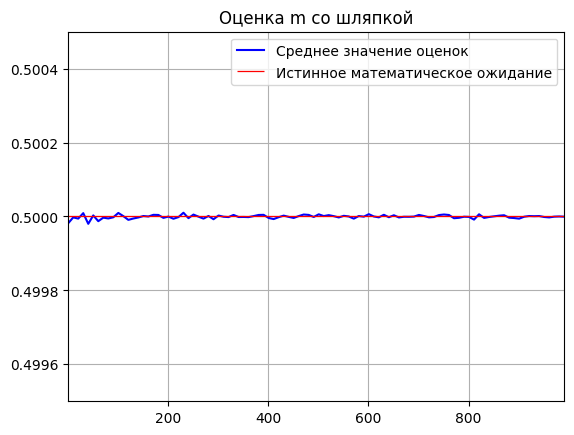

In [4]:
# максимальное количество выборок
max_num_of_samples = 1000

# лист количества выборок
num_of_samples = [i for i in range(1, max_num_of_samples + 1, 10)]

# длина одной выборки
sample_size = 10000

# листы для средних значений оценок при различном количестве выборок
av_of_bar_X = []
av_of_hat_m = []

# цикл, где вычисляются средние значения оценок при различном количестве выборок
for i in num_of_samples:
    # листы выборок оценок
    bar_X_sample, hat_m_sample = [], []

    # генерируем выборки
    for j in range(i):
        a, b = uniform_evaluations(0, 1, sample_size)
        bar_X_sample.append(a)
        hat_m_sample.append(b)

    # берем среднее значение выборки
    # по теореме Чебышёва при увеличении выборки оно стремится к мат ожиданию
    av_of_bar_X.append(sum(bar_X_sample) / i)
    av_of_hat_m.append(sum(hat_m_sample) / i)

# строим график для оценки X с чертой
plt.figure()
plt.plot(num_of_samples, av_of_bar_X, color='b', label='Среднее значение оценок')
ax = plt.gca()
ax.set_ylim([0.495, 0.505])
ax.set_xlim([1, max(num_of_samples)])
plt.hlines(0.5, 1, max(num_of_samples), colors="r", lw=2, 
           label="Истинное математическое ожидание")
plt.title("Оценка X с чертой")
plt.legend()
plt.grid(True)

# строим график для оценки m со шляпкой
plt.figure()
ax = plt.gca()
plt.plot(num_of_samples, av_of_hat_m, color='b', label='Среднее значение оценок')
ax.set_ylim([0.4995, 0.5005])
ax.set_xlim([1, max(num_of_samples)])
plt.hlines(0.5, 1, max(num_of_samples), colors="r", lw=0.9, 
           label="Истинное математическое ожидание")
plt.title("Оценка m со шляпкой")
plt.legend()
plt.grid(True)

По теореме Чебышёва выборочное среднее оценки сходится по вероятности к математическому ожиданию этой оценки:
$$\frac{1}{N} \sum\limits_{i = 1}^{N} \bar{X_i}\xrightarrow[n \to \infty]{P} M[\bar{X}],\ \frac{1}{N} \sum\limits_{i = 1}^{N} \hat{m_i}\xrightarrow[n \to \infty]{P} M[\hat{m}]$$

Как мы видим из графиков, средние значения оценок сходятся к математическому ожиданию случайной величины X. А из теоремы Чебышёва мы получили, что средние значения оценок сходятся к математическим значениям этих оценок. А значит:
$$M[\bar{X}] \xrightarrow[n \to \infty]{P} M[X],\ M[\hat{m}] \xrightarrow[n \to \infty]{P} M[X]$$

То есть оценки несмещенные.

Text(0.5, 1.0, 'Среднее минимума и максимума')

<Figure size 640x480 with 0 Axes>

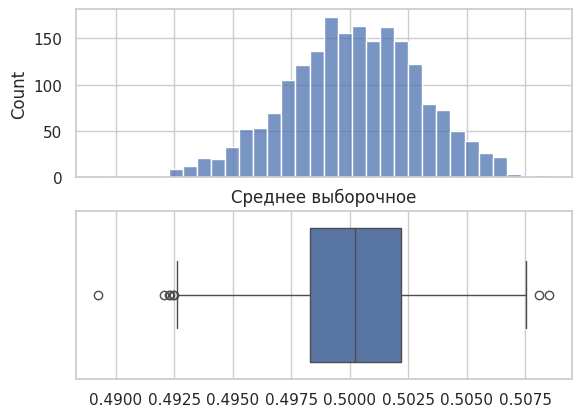

<Figure size 640x480 with 0 Axes>

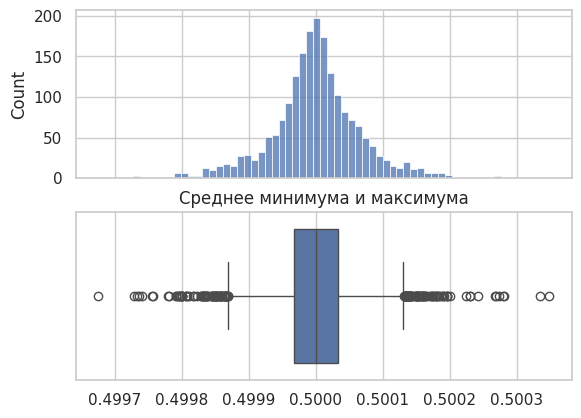

In [5]:
# количество выборок
num_of_samples = 2000

# длина одной выборки
sample_size = 10000

# листы выборок оценок
bar_X_sample, hat_m_sample = [], []

# генерируем выборки
for j in range(num_of_samples):
    a, b = uniform_evaluations(0, 1, sample_size)
    bar_X_sample.append(a)
    hat_m_sample.append(b)

# визуализируем оценку среднего всей выборки
plt.figure()
seaborn.set(style='whitegrid')
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)
seaborn.histplot(bar_X_sample, ax=ax_hist)
seaborn.boxplot(bar_X_sample, ax=ax_box, orient="h")
plt.title("Среднее выборочное")

# визуализируем оценку среднего минимума и максимума
plt.figure()
seaborn.set(style='whitegrid')
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)
seaborn.histplot(hat_m_sample, ax=ax_hist)
seaborn.boxplot(hat_m_sample, ax=ax_box, orient="h")
plt.title("Среднее минимума и максимума")

Из приведенных графиков можно заметить, что у оценки $\hat{m}$ дисперсия меньше, следовательно она является более эффективной.

### Задание 2
Теоретически проверьте выводы о свойствах оценок $\bar{X}$ и $\hat{m}$, к которым вы пришли в ходе выполнения задания 1.

Оценка $\bar{X} = \frac{1}{n} \sum\limits_{k = 1}^n X_k$.

Докажем несмещенность:
$$M[\bar{X}] = M\left[\frac{1}{n} \sum\limits_{k = 1}^n X_k\right] = \frac{1}{n} \sum\limits_{k = 1}^n M[X_k] = \frac{1}{n} \sum\limits_{k = 1}^n M[X] = M[X]$$

Докажем состоятельность с помощью достаточного условия (оценка состоятельная, если она несмещенная и дисперсия стремится к 0 при увеличении длины выборки):
$$D[\bar{X}] = D\left[\frac{1}{n}\sum\limits_{k = 1}^n X_k\right] = \frac{1}{n^2} D\left[\sum\limits_{k = 1}^n X_k\right] = \frac{1}{n^2} \left(\sum\limits_{k = 1}^n D[X_k]\right) = \frac{1}{n^2} nD[X] = \frac{1}{12n} \xrightarrow{n \to \infty} 0$$

Оценка $\hat{m} = \frac{X^{(1)} + X^{(2)}}{2}$.

Прежде, чем приступить к доказательствам:

- Пусть $X_1,\, X_2,\, ...,\, X_n$ выборка длины $n$ порожденная случайной величиной $X \sim R(0,\, 1)$. Тогда заметим, что:
$$\min{(X_1,\, X_2,\, ...,\, X_n)} = 1 - \max{(1 - X_1,\, 1 - X_2,\, ...,\, 1 - X_n)}$$
- Также стоит заметить, что если $X \sim R(0,\, 1)$, то и $1 - X \sim R(0,\, 1)$.

Пусть $X^{(1)} = \min{(X_1,\, X_2,\, ...,\, X_n)},\ X^{(2)} = \max{(X_1,\, X_2,\, ...,\, X_n)}$. Тогда:

 - Функция распределения:

$
\begin{align*}
&F_{X^{(2)}}(z) = P\{X^{(2)} < z\} = P\{\max{(X_1,\, X_2,\, ...,\, X_n)} < z\} = P\{X_1 < z \wedge X_2 < z \wedge ... \wedge X_n < z\} = P\{X_1 < z\} \cdot P\{X_2 < z\} ...\, P\{X_n < z\} = F_{X_1}(z) \cdot F_{X_2}(z)\, ...\, F_{X_n}(z) = F_X^n(z) =
\begin{cases}
0,\ z \leq 0\\
z^n,\ 0 < z \leq 1\\
1,\ 1 < z
\end{cases}
\\\\
&F_{X^{(1)}}(z) = P\{X^{(1)} < z\} = P\{\min{(X_1,\, X_2,\, ...,\, X_n)} < z\} = P\{1 - \max{(1 - X_1,\, 1 - X_2,\, ...,\, 1 - X_n)} < z\} = P\{\max{(1 - X_1,\, 1 - X_2,\, ...,\, 1 - X_n)} > 1 - z\} = 1 - P\{\max{(1 - X_1,\, 1 - X_2,\, ...,\, 1 - X_n)} < 1 - z\} = 1 - P\{1 - X_1 < 1 - z\} \cdot P\{1 - X_2 < 1 - z\}\, ...\, P\{1 - X_n < 1 - z\} = 1 - P\{X_1 > z\}\, ...\, P\{X_n > z\} = 1 - (1 - F_{X_1}(z))...(1 - F_{X_n}(z)) = 1 - (1 - F_X(z))^n =
\begin{cases}
0,\ z \leq 0\\
1 - (1 - z)^n,\ 0 < z \leq 1\\
1,\ 1 < z
\end{cases}
\end{align*}
$

 - Функция плотности:

$
\begin{align*}
&f_{X^{(2)}}(z) = (F_{X^{(2)}}(z))' = 
\begin{cases}
nz^{n - 1},\ z \in (0,\, 1]\\
0,\ z \notin (0,\, 1]
\end{cases}
\\\\
&f_{X^{(1)}}(z) = (F_{X^{(1)}}(z))' = 
\begin{cases}
n(1 - z)^{n - 1},\ z \in (0,\, 1]\\
0,\ z \notin (0,\, 1]
\end{cases}
\end{align*}
$

 - Математическое ожидание:

$
\begin{align*}
&M[X^{(2)}] = \int\limits_{-\infty}^{+\infty} z f_{X^{(2)}}(z)\, dz = \int\limits_{0}^{1} z \cdot nz^{n - 1}\, dz = \int\limits_{0}^{1} nz^n\, dz = \frac{n}{n + 1}
\\\\
&M[X^{(1)}] = M[1 - \max{(1 - X_1,\, 1 - X_2,\, ...,\, 1 - X_n)}] = 1 - M[X^{(2)}] = \frac{1}{n + 1}
\end{align*}
$

 - Дисперсия

$
\begin{align*}
&D[X^{(2)}] = \int\limits_{-\infty}^{+\infty} z^2 f_{X^{(2)}}(z)\, dz - M[X^{(2)}]^2 = \int\limits_{0}^{1} nz^{n + 1}\, dz - \frac{n^2}{n^2 + 2n + 1} = \frac{n}{n + 2} - \frac{n^2}{n^2 + 2n + 1} = \frac{n}{n^3 + 4n^2 + 5n + 2}
\\\\
&D[X^{(1)}] = \int\limits_{-\infty}^{+\infty} z^2 f_{X^{(1)}}(z)\, dz - M[X^{(1)}]^2 = \int\limits_{0}^{1} nz^2 (1 - z)^{n - 1}\, dz - \frac{1}{n^2 + 2n + 1} = \int\limits_{0}^{1} nz^2 (1 - z)^{n - 1}\, dz - \frac{1}{n^2 + 2n + 1} = \int\limits_{0}^{1} n(1 - z)^2 z^{n - 1}\, dz - \frac{1}{n^2 + 2n + 1} = 1 - \frac{2n}{n + 1} + \frac{n}{n + 2} - \frac{1}{n^2 + 2n + 1} = \frac{n}{n^3 + 4n^2 + 5n + 2}
\end{align*}
$

Докажем несмещенность:
$$M[\hat{m}] = M\left[\frac{X^{(1)} + X^{(2)}}{2}\right] = \frac{M[X^{(1)}] + M[X^{(2)}]}{2} = \frac{1}{2} = M[X]$$

Докажем состоятельность (с помощью достаточного условия):

$
\newcommand{\Cov}{\mathrm{Cov}}
\begin{align*}
&D[\hat{m}] = D\left[\frac{X^{(1)} + X^{(2)}}{2}\right] = \frac{1}{4}D[X^{(1)}] + \frac{1}{4}D[X^{(2)}] + \Cov{[X^{(1)},\, X^{(2)}]} = \frac{1}{2}D[X^{(1)}] + \frac{1}{2}D[X^{(1)}] \cdot \rho{[X^{(1)},\, X^{(2)}]} = \frac{n(1 + \rho{[X^{(1)},\, X^{(2)}]})}{n^3 + 4n^2 + 5n + 2}\\
&D[\hat{m}] \xrightarrow{n \to \infty} 0
\end{align*}
$


Теперь можно посмотреть, какая оценка является более эффективной. Выпишем дисперсии:
$
\begin{align*}
&D[\bar{X}] = \frac{1}{12n}\\
&D[\hat{m}] = \frac{n}{n^3 + 4n^2 + 5n + 2}(1 + \rho{[X^{(1)},\, X^{(2)}]})
\end{align*}
$

Посчитаем следующий предел:
$$\lim\limits_{n \to +\infty} \frac{D[\hat{m}]}{D[\bar{X}]} = \lim\limits_{n \to +\infty} \frac{n(1 + \rho{[X^{(1)},\, X^{(2)}]}) \cdot 12n}{n^3 + 4n^2 + 5n + 2} = 0$$
Отсюда следует, что порядок малости $D[\hat{m}]$ выше, а значит оценка $\hat{m}$ является более эффективной.

### Задание 3
Проводятся последовательные испытания по схеме Бернулли с вероятность успеха 0.25. Случайная величина $X$ - длина появляющихся серий ("успехов" или "неудач"), случайная величина $Y$ - длина первой серии (число "успехов" до первой неудачи или число "неудач" до первого успеха). Используя метод статистических испытаний, оцените математическое ожидание, медиану, дисперсию, среднее квадратичное отклонение случайных величин $X$ и $Y$.

За один раз будем проводить фиксированное число испытаний, где Y - длина первой серии, а X - средняя длина всех получающихся серий успехов и неудач. 

In [6]:
# функция для моделирования одного эксперимента
def experiment(probability):
    return np.random.choice([0, 1], p=[1 - probability, probability])

# функция для моделирования серии экспериментов
def experiments(size, probability):
    return [experiment(probability) for i in range(size)]

# функция, которая считает длины серий успехов и неудачи
def lengthes(series):
    lenghtes = [1]
    for i in range(1, len(series)):
        if series[i - 1] == series[i]:
            lenghtes[-1] += 1
        else:
            lenghtes.append(1)
    return lenghtes

# функция для вычисления среднего арифметического выборки
def mean(sample):
    return sum(sample) / len(sample)

In [7]:
# количество экспериментов "за раз"
num_of_experiments = 1000

# вероятность успеха 
probability = 0.25

# размер выборок X и Y
sample_size = 10000

# листы выборок X и Y
Y_sample = []
X_sample = []

# цикл, где генерируем выборки
for i in range(sample_size):
    # серия экспериментов
    s = experiments(num_of_experiments, probability)

    # лист длин серий успехов и неудач
    lens = lengthes(s)

    # добавляем длину первой серии в выборку Y
    Y_sample.append(lens[0])

    # добавляем среднюю длину всех серий в выборку X
    X_sample.append(mean(lens))

# считаем характеристики для X
X_mean = np.mean(X_sample)
X_median = np.median(X_sample)
X_variance = np.var(X_sample)
X_std = np.std(X_sample)

# считаем характеристики для Y
Y_mean = np.mean(Y_sample)
Y_median = np.median(Y_sample)
Y_variance = np.var(Y_sample)
Y_std = np.std(Y_sample)

# выводим результаты на экран
print(f"""Случайная величина X:
Математическое ожидание: {X_mean}
Медиана: {X_median}
Дисперсия: {X_variance}
Среднее квадратичное отклонение: {X_std}""")

print()

print(f"""Случайная величина Y:
Математическое ожидание: {Y_mean}
Медиана: {Y_median}
Дисперсия: {Y_variance}
Среднее квадратичное отклонение: {Y_std}""")

Случайная величина X:
Математическое ожидание: 2.670337225802349
Медиана: 2.6666666666666665
Дисперсия: 0.01733897253653254
Среднее квадратичное отклонение: 0.13167753239080895

Случайная величина Y:
Математическое ожидание: 3.3019
Медиана: 2.0
Дисперсия: 9.664356389999998
Среднее квадратичное отклонение: 3.1087547973424985


### Задание 4 (вариант - 1)
На окружности радиуса 8 находится точка. В последовательные моменты времени $i\ (i=1,\, 2,\, 3,\, ...)$ точка передвигается по окружности (в одну и ту же сторону) на случайное расстояние $X_i$, распределенное по показательному закону с параметром 0.2. Случайная величина $Y$ - номер того шага, на котором точка пересечет свою исходную позицию. Методом статистических испытаний оцените математическое ожидание, медиану и дисперсию случайной величины $Y$, а также получите оценки начальных и центральных моментов третьего и четвертого порядка.

In [8]:
# реализация случайной величины X_i
def gen_X_i(lm):
    return np.random.exponential(1 / lm, 1)

# среднее выборочное
def mean(sample):
    return sum(sample) / len(sample)

# выборочный начальный момент
def raw_moment(sample, order):
    return sum([i**order for i in sample]) / len(sample)

# выборочный центральный момент
def central_moment(sample, order):
    m = mean(sample)
    return sum([(i - m)**order for i in sample]) / len(sample)

In [9]:
# радиус окружности
radius = 8

# параметр показательного распределения
lm = 0.2

# размер выборки
sample_size = 10000

# выборка Y
Y_sample = []

# цикл для генерации выборки Y
for i in range(sample_size):
    length = 2 * np.pi * radius
    Y_sample.append(0)
    while length > 0:
        length -= gen_X_i(lm)
        Y_sample[-1] += 1

# считаем характеристики для Y
Y_mean = np.mean(Y_sample)
Y_median = np.median(Y_sample)
Y_variance = np.var(Y_sample)
Y_raw_moment_3 = raw_moment(Y_sample, 3)
Y_raw_moment_4 = raw_moment(Y_sample, 4)
Y_central_moment_3 = central_moment(Y_sample, 3)
Y_central_moment_4 = central_moment(Y_sample, 4)

# выводим характеристики на экран
print(f"""Случайная величина Y:
Математическое ожидание: {Y_mean}
Медиана: {Y_median}
Дисперсия: {Y_variance}
Начальный момент 3 порядка: {Y_raw_moment_3}
Начальный момент 4 порядка: {Y_raw_moment_4}
Центральный момент 3 порядка: {Y_central_moment_3}
Центральный момент 4 порядка: {Y_central_moment_4}""")

Случайная величина Y:
Математическое ожидание: 11.0466
Медиана: 11.0
Дисперсия: 10.174828439999999
Начальный момент 3 порядка: 1695.7566
Начальный момент 4 порядка: 23128.863
Центральный момент 3 порядка: 10.577257789391405
Центральный момент 4 порядка: 321.1672229297154
